# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.stats import norm

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
# Your work here.
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [4]:
print(df.info())

print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB
None
temperature    0
gender         0
heart_rate     0
dtype: int64


### 1) is the distribution of body temperatures normal
### Because n=130 > 30, we can consider this to be normally distributed

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


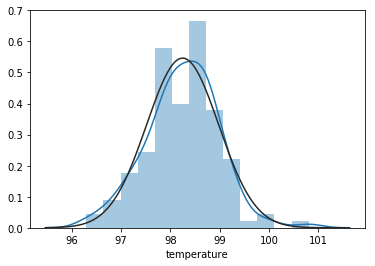

In [5]:
# Let's plot the distribution and see what it looks like.
sns.distplot(df['temperature'], fit=norm)

In [6]:
# conduct normal test
from scipy.stats import normaltest
statistic, p_val = normaltest(df['temperature'])

print('chi-square', statistic)
print('p-val = ', p_val)

chi-square 2.703801433319203
p-val =  0.2587479863488254


### NL: Because p_val 0.2587 > 0.05, null hypothesis testing shows that the data comes from a normal distribution.

### 2) Is the sample size large? Are the observations independent?

In [7]:
df.groupby('gender').size()

gender
F    65
M    65
dtype: int64

### NL: n>30, group is assumed to be independent

## 3) Is the true population mean really 98.6 degress F?
### First, try a bootstrap hypothesis test.
### Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
### In this situation, is it appropriate to use the $t$ or $z$ statistic?
### Now try using the other test. How is the result be different? Why?


### NL:  Going to be using a one-sample test, given that we are comparing one type of sample (temp) to a single, known population mean.

### NL: T-test, population STD is unknown (will try both z and t test, however)

### NL: To start:
####   Null Hypothesis: The true temperature of the population is 98.6 F.
####   Alternate Hypothesis: The true temperature is NOT 98.6 F.

In [8]:
# Classic hand calc statistics for z_value
sample_mean = np.mean(df['temperature'])
sample_std = np.std(df['temperature'])
test_mean = 98.6
n = 130

In [9]:
# calculate Z value to start
Z = ((sample_mean - test_mean) / ((sample_std)/np.sqrt(n-1)))
print(Z)

-5.454823292364079


In [10]:
# using t_test 1 sample from scipy to cross check the number
from scipy.stats import ttest_1samp
t_stat, p_val_t = ttest_1samp(df['temperature'], 98.6)
print('t-statistic:',t_stat)
print('p value =',p_val_t)

t-statistic: -5.4548232923645195
p value = 2.4106320415561276e-07


#### NL: Because the p_value is a lot less than 0.05, the null hypothesis is rejected again. Which means the true mean population temperature is not 98.6F

## 4) At what temperature should we consider someone's temperature to be "abnormal"

In [11]:
# we calculated the STD of the data set earlier in sample_std
print(sample_std)

0.7303577789050377


In [12]:
# To be "abnormal" which is to same above the 95% confidence internval of the standard deviation from the mean, we have:
CI_upper = sample_mean + (sample_std*2)
CI_lower = sample_mean - (sample_std*2)
print(CI_upper, CI_lower)

99.70994632704085 96.7885152114207


#### NL: To be "abnormal", you will have to have a temperature above 99.7 F or below 96.9 F

### 5) Is there a significant difference between males and females in normal temperature

### What test did you use and try? Write a story with your conclusion in the context of the original problem.

In [15]:
male_temp = np.array(df.temperature[df.gender == "M"])
female_temp = np.array(df.temperature[df.gender == "F"])

#### NL: we know previously that there's 65 samples in both males and female columns, hence we can use normal distribution again and proceed with a t_test since std is unknown

In [16]:
import scipy.stats as st
st.ttest_ind(female_temp, male_temp)

Ttest_indResult(statistic=2.2854345381656103, pvalue=0.02393188312239561)

#### NL: Since p_value of the t_test is < 0.05, we can reject the null hypothesis to the alternate hypothesis, which is that there's a significant difference between the male and female mean body temperature